In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


## #1 Approach -> training different models for smokers and drinkers

In [3]:
list(df.columns)

['sex',
 'age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'hear_left',
 'hear_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'SMK_stat_type_cd',
 'DRK_YN']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

In [5]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df.sex[df.sex == 'Male'] = 1
df.sex[df.sex == 'Female'] = 0
df

C:\Users\pushk\AppData\Local\Temp\ipykernel_2288\693755319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df.sex == 'Male'] = 1
C:\Users\pushk\AppData\Local\Temp\ipykernel_2288\693755319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df.sex == 'Female'] = 0


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,1,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,0,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,1,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [7]:
df.DRK_YN.unique()

array(['Y', 'N'], dtype=object)

In [8]:
df.DRK_YN[df.DRK_YN == 'Y'] = 1
df.DRK_YN[df.DRK_YN == 'N'] = 0
df

C:\Users\pushk\AppData\Local\Temp\ipykernel_2288\947224967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DRK_YN[df.DRK_YN == 'Y'] = 1
C:\Users\pushk\AppData\Local\Temp\ipykernel_2288\947224967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DRK_YN[df.DRK_YN == 'N'] = 0


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,0
991342,1,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,0
991343,0,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,1
991344,1,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,0


In [9]:
import numpy as np

# Target Variable

-> DRK_YN (Drinking -> Yes or No)
-> SMK_stat_type_cd (Smoker -> Type)

## The goal is to predict smokers and drinkers using body signal data.
### ***So, dropping data cols which are not related to body signals*** 


In [10]:
ndf = df

In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

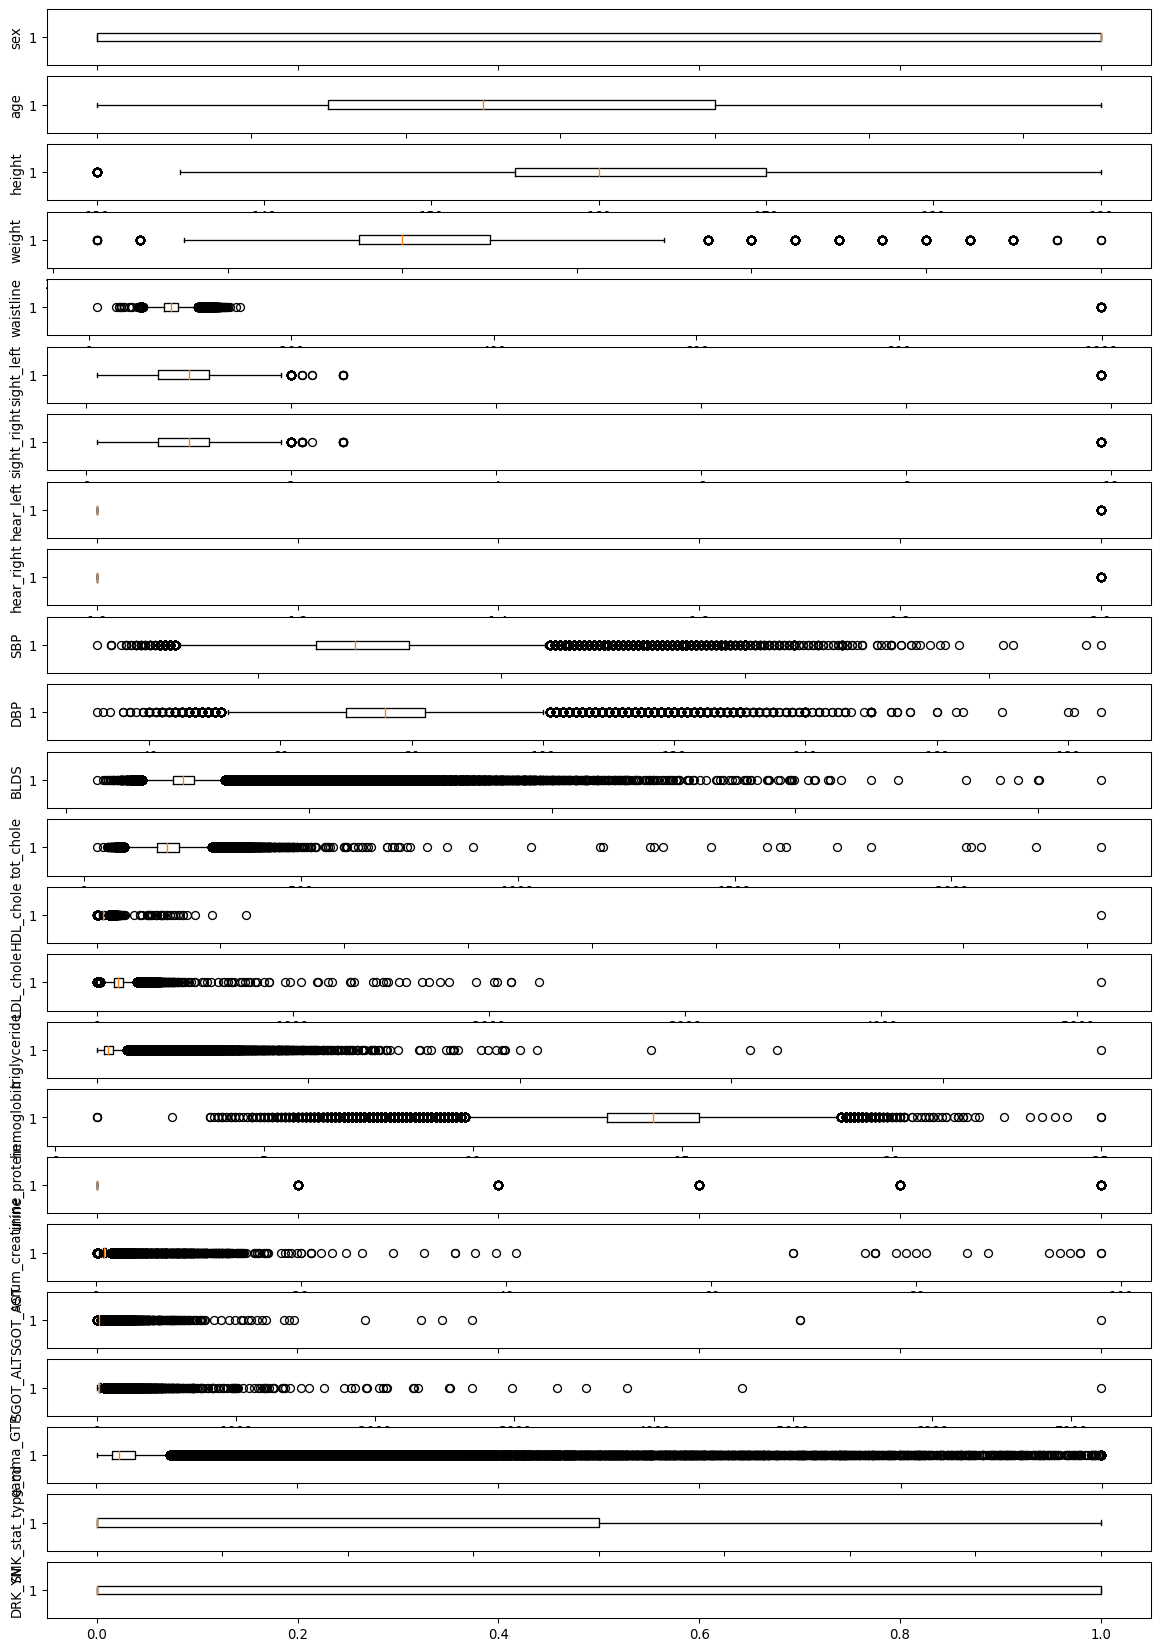

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(24,1,dpi=95, figsize=(15,22))
i = 0
for col in ndf.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [13]:
ndf = ndf.drop_duplicates()

In [14]:
ndf

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,0
991342,1,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,0
991343,0,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,1
991344,1,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,0


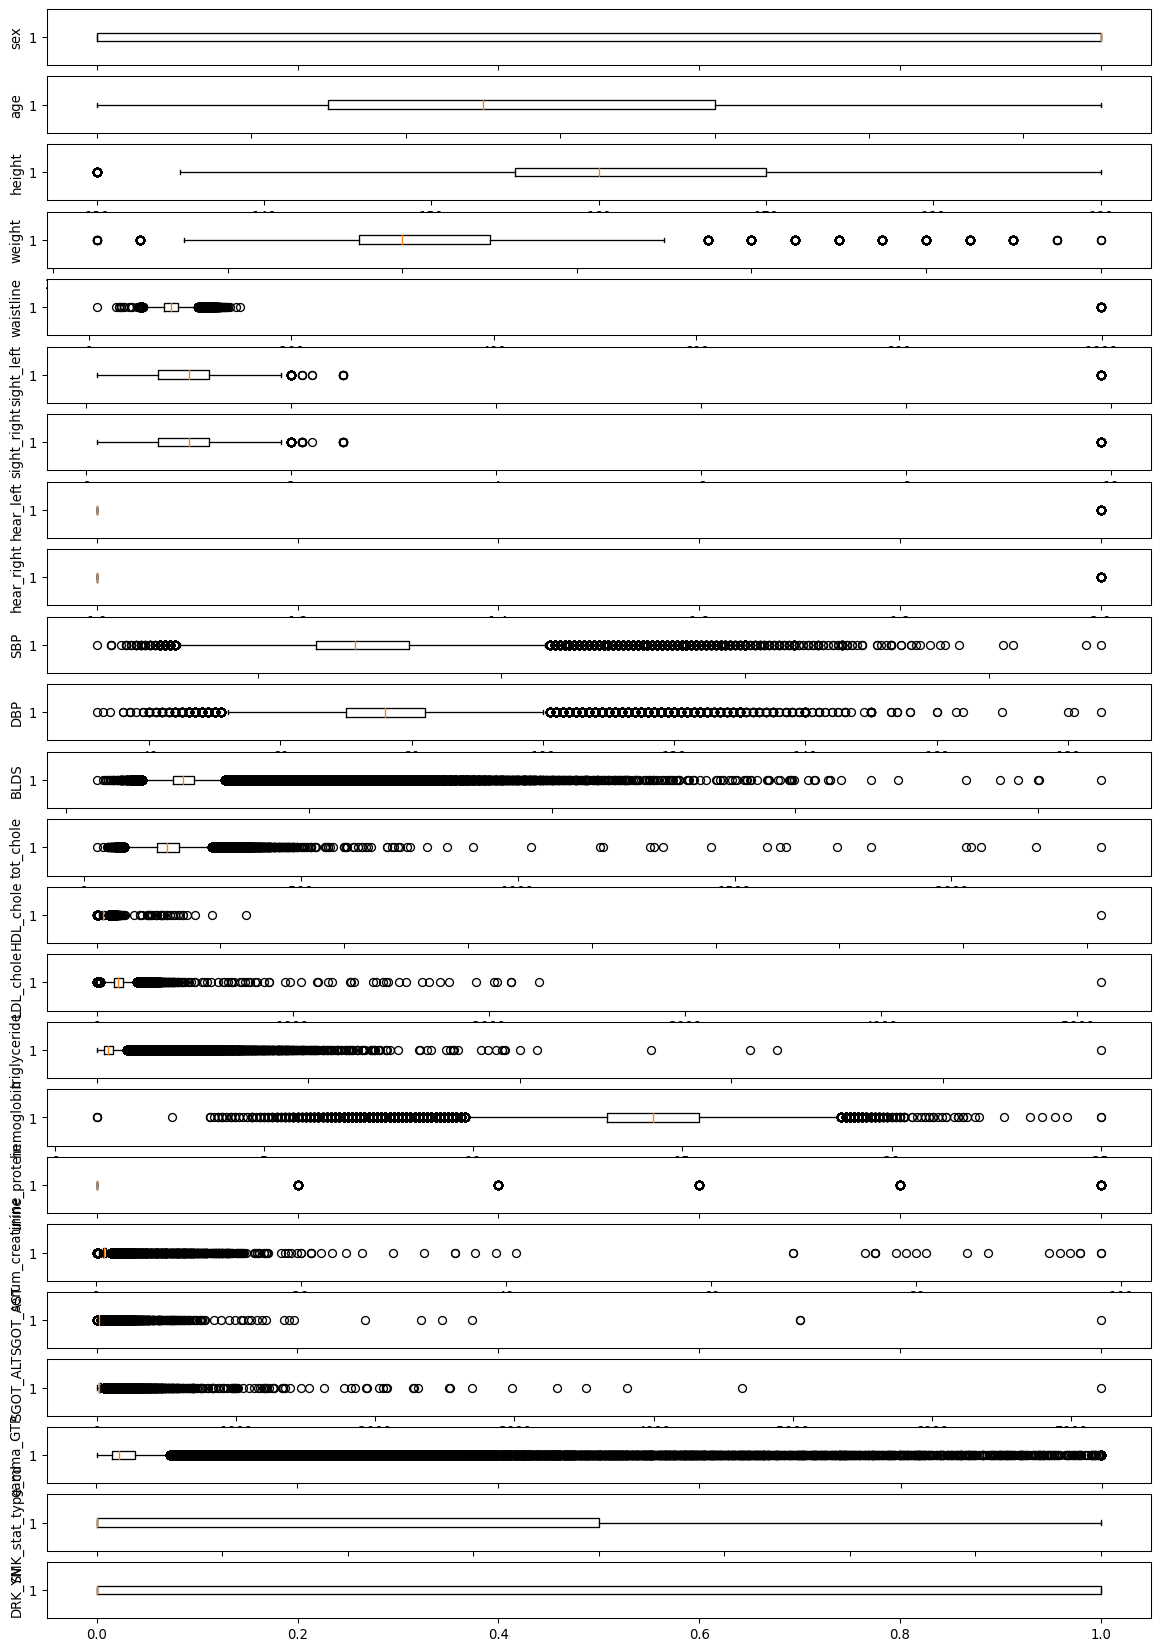

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(24,1,dpi=95, figsize=(15,22))
i = 0
for col in ndf.columns:
    axs[i].boxplot(ndf[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [16]:
from collections import Counter #for outliers detection
def detect_outliers(ndf, min_outlier_occurrences, columns):
    outlier_rows = []
    for col in columns:
        q1 = np.nanpercentile(ndf[col], 25)
        q3 = np.nanpercentile(ndf[col], 75)
        iqr = q3 - q1
        outlier_point = 1.5 * iqr
        outliers = ndf[(ndf[col] < q1 - outlier_point) | (ndf[col] > q3 + outlier_point)].index
        outlier_rows.extend(outliers)

    outlier_counts = Counter(outlier_rows)
    outlier_rows_to_drop = [row for row, count in outlier_counts.items() if count >= min_outlier_occurrences]

    return outlier_rows_to_drop


outlier_rows = detect_outliers(ndf, 5, ndf.select_dtypes(["float", "int"]).columns)
ndf = ndf.drop(outlier_rows)

In [17]:
ndf.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [18]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983304 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               983304 non-null  object 
 1   age               983304 non-null  int64  
 2   height            983304 non-null  int64  
 3   weight            983304 non-null  int64  
 4   waistline         983304 non-null  float64
 5   sight_left        983304 non-null  float64
 6   sight_right       983304 non-null  float64
 7   hear_left         983304 non-null  int64  
 8   hear_right        983304 non-null  int64  
 9   SBP               983304 non-null  int64  
 10  DBP               983304 non-null  int64  
 11  BLDS              983304 non-null  int64  
 12  tot_chole         983304 non-null  int64  
 13  HDL_chole         983304 non-null  int64  
 14  LDL_chole         983304 non-null  int64  
 15  triglyceride      983304 non-null  int64  
 16  hemoglobin        98

In [19]:
ndf

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,0
991342,1,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,0
991343,0,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,1
991344,1,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,0


In [20]:
# ndf['SMK_stat_type_cd'] = ndf['SMK_stat_type_cd'] - 1
y_smoke = ndf['SMK_stat_type_cd']
y_drink = ndf['DRK_YN']
# ndf = ndf.drop(['sex','age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right','SMK_stat_type_cd','DRK_YN'],axis='columns')
ndf = ndf.drop(['SMK_stat_type_cd','DRK_YN'],axis='columns')
ndf

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,193,48,126,92,17.1,1,1.0,21,35,40
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,228,55,148,121,15.8,1,0.9,20,36,27
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,136,41,74,104,15.8,1,0.9,47,32,68
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,201,76,104,106,17.6,1,1.1,29,34,18
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,199,61,117,104,13.8,1,0.8,19,12,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1,1,114,...,198,46,125,132,15.0,1,1.0,26,36,27
991342,1,35,170,75,86.0,1.0,1.5,1,1,119,...,133,40,84,45,15.8,1,1.1,14,17,15
991343,0,40,155,50,68.0,1.0,0.7,1,1,110,...,205,96,77,157,14.3,1,0.8,30,27,17
991344,1,25,175,60,72.0,1.5,1.0,1,1,119,...,122,38,73,53,14.5,1,0.8,21,14,17


In [21]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
ndf = pca.fit_transform(ndf)
ndf.shape

(983304, 11)

In [22]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test  = train_test_split(ndf, y_smoke, test_size=0.4, shuffle = True, random_state=1)
x2_train, x2_test, y2_train, y2_test  = train_test_split(ndf, y_drink, test_size=0.15, shuffle = True, random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler # for encoding and standardization
scaler = StandardScaler()
scaler.fit(x1_train)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)
scaler.fit(x2_train)
x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)

In [24]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
from collections import Counter #for outliers detection
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
import plotly.express as px #for scatter 3d
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # for encoding and standardization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sn
%matplotlib inline

# XGBoost 

In [25]:
from xgboost import XGBClassifier

In [26]:
y1_XG_train = y1_train - 1
y1_XG_train

383817    0
534650    0
540558    2
872259    0
136899    2
         ..
495313    2
798130    1
474813    1
495808    2
129127    1
Name: SMK_stat_type_cd, Length: 786643, dtype: int64

In [27]:
xgb_model1 = XGBClassifier()
xgb_model1.fit(x1_train, y1_XG_train)
pred1_xgb = xgb_model1.predict(x1_test)

In [28]:
y1_XG_test = y1_test - 1
accuracy_Score1_xgb = accuracy_score(y1_XG_test, pred1_xgb)
print('XGBoosting model accuracy is: {:.2f}%'.format(accuracy_Score1_xgb*100))

XGBoosting model accuracy is: 66.73%


Text(95.72222222222221, 0.5, 'Truth')

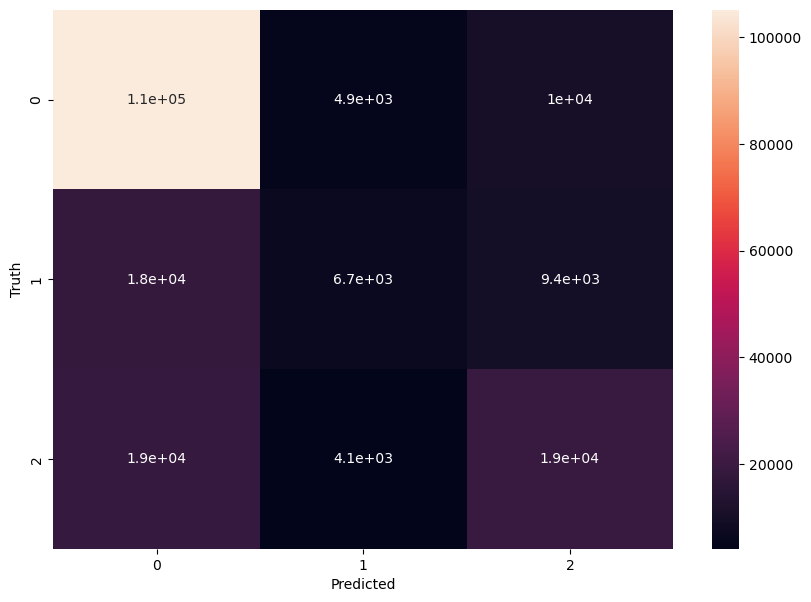

In [29]:
matrixxgboost1 = confusion_matrix(y1_XG_test, pred1_xgb)
plt.figure(figsize=(10,7))
sn.heatmap(matrixxgboost1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
y2_train = y2_train.astype('int')
y2_test = y2_test.astype('int')
x2_train = x2_train.astype('int')
x2_test = x2_test.astype('int')
xgb_model2 = XGBClassifier()
xgb_model2.fit(x2_train, y2_train)
pred2_xgb = xgb_model2.predict(x2_test)
accuracy_Score2_xgb = accuracy_score(y2_test, pred2_xgb)
print('XGBoosting model accuracy is: {:.2f}%'.format(accuracy_Score2_xgb*100))

XGBoosting model accuracy is: 64.60%


Text(95.72222222222221, 0.5, 'Truth')

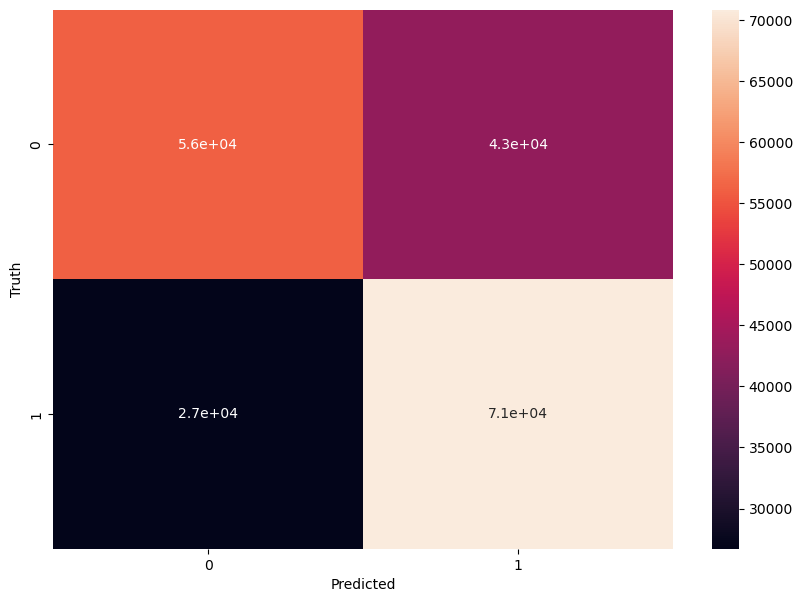

In [31]:
matrixxgboost2 = confusion_matrix(y2_test, pred2_xgb)
plt.figure(figsize=(10,7))
sn.heatmap(matrixxgboost2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Random Forest

In [32]:
models1 = RandomForestClassifier()
models1.fit(x1_train, y1_train)
y1_predict_random = models1.predict(x1_test)
accuracy_Score_random1 = accuracy_score(y1_test, y1_predict_random)
print('RandomForest model accuracy is: {:.2f}%'.format(accuracy_Score_random1*100))

RandomForest model accuracy is: 65.91%


Text(95.72222222222221, 0.5, 'Truth')

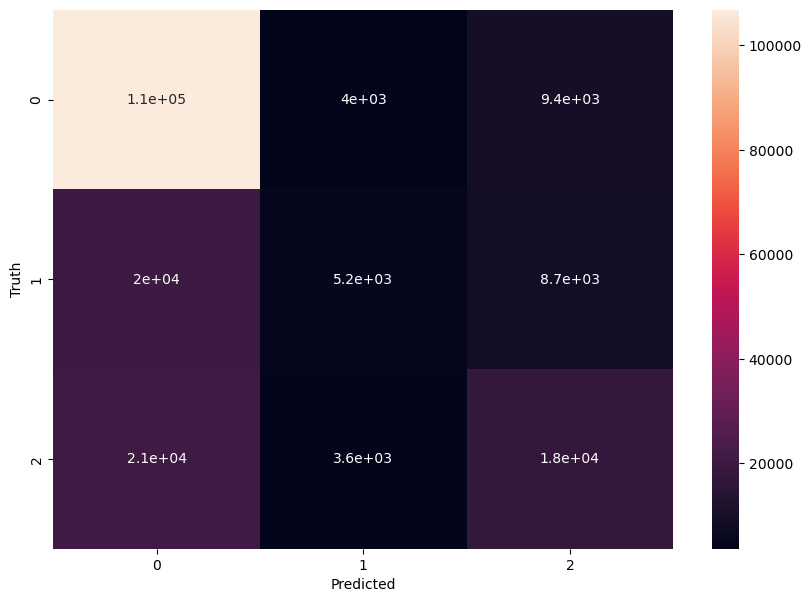

In [33]:
matrixrandom1 = confusion_matrix(y1_test, y1_predict_random)
plt.figure(figsize=(10,7))
sn.heatmap(matrixrandom1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
models2 = RandomForestClassifier()
models2.fit(x2_train, y2_train)
y2_predict_random = models2.predict(x2_test)
accuracy_Score_random2 = accuracy_score(y2_test, y2_predict_random)
print('RandomForest model accuracy is: {:.2f}%'.format(accuracy_Score_random2*100))

RandomForest model accuracy is: 64.15%


Text(95.72222222222221, 0.5, 'Truth')

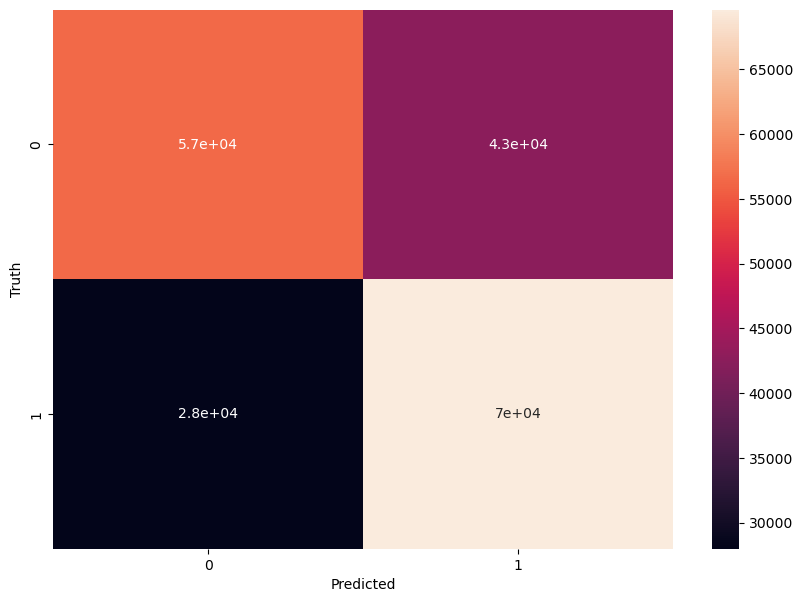

In [35]:
matrixrandom2 = confusion_matrix(y2_test, y2_predict_random)
plt.figure(figsize=(10,7))
sn.heatmap(matrixrandom2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SVM

In [36]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear')

In [ ]:
x1_svm_train, x1_svm_test, y1_svm_train, y1_svm_test  = train_test_split(ndf, y_smoke, test_size=0.9, shuffle = True, random_state=1)
x2_svm_train, x2_svm_test, y2_svm_train, y2_svm_test  = train_test_split(ndf, y_drink, test_size=0.8, shuffle = True, random_state=1)

In [ ]:
svm1.fit(x1_svm_train, y1_svm_train)
y1_predict_SVM = svm1.predict(x1_svm_test)
accuracy_Score_SVM = accuracy_score(y1_svm_test, y1_predict_SVM)
print('SVM model accuracy is: {:.2f}%'.format(accuracy_Score_SVM*100))

In [ ]:
matrixsvc1 = confusion_matrix(y1_test, y1_predict_SVM)
plt.figure(figsize=(10,7))
sn.heatmap(matrixsvc1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
svm2 = SVC(kernel='linear')
svm2.fit(x2_train, y2_train)
y2_predict_SVM = svm2.predict(x2_test)
accuracy_Score_SVM = accuracy_score(y2_test, y2_predict_SVM)
print('SVM model accuracy is: {:.2f}%'.format(accuracy_Score_SVM*100))

In [ ]:
matrixsvc2 = confusion_matrix(y2_test, y2_predict_SVM)
plt.figure(figsize=(10,7))
sn.heatmap(matrixsvc2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# MLP

In [25]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x1_train, y1_train)
y1_predict_MLP = classifier.predict(x1_test)
accuracy_Score_MLP = accuracy_score(y1_test, y1_predict_MLP)
print('MLP model accuracy is: {:.2f}%'.format(accuracy_Score_MLP*100))

MLP model accuracy is: 67.53%


Text(95.72222222222221, 0.5, 'Truth')

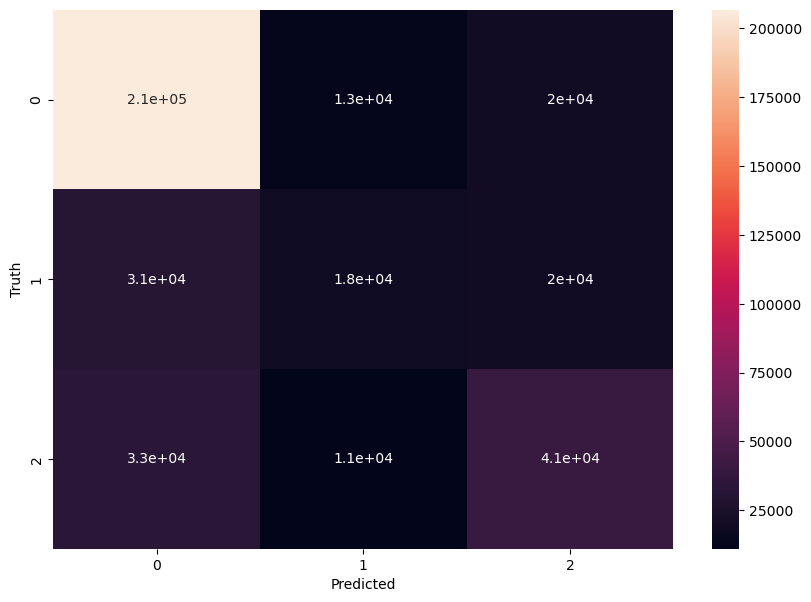

In [26]:
matrixnn1 = confusion_matrix(y1_test, y1_predict_MLP)
plt.figure(figsize=(10,7))
sn.heatmap(matrixnn1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
y2_train = y2_train.astype('int')
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x2_train, y2_train)
y2_predict_MLP = classifier.predict(x2_test)

In [32]:
y2_test = y2_test.astype('int')
classifier.score(x2_test,y2_test)
print('MLP model accuracy is: {:.2f}%'.format(accuracy_Score_MLP*100))

MLP model accuracy is: 67.53%


Text(95.72222222222221, 0.5, 'Truth')

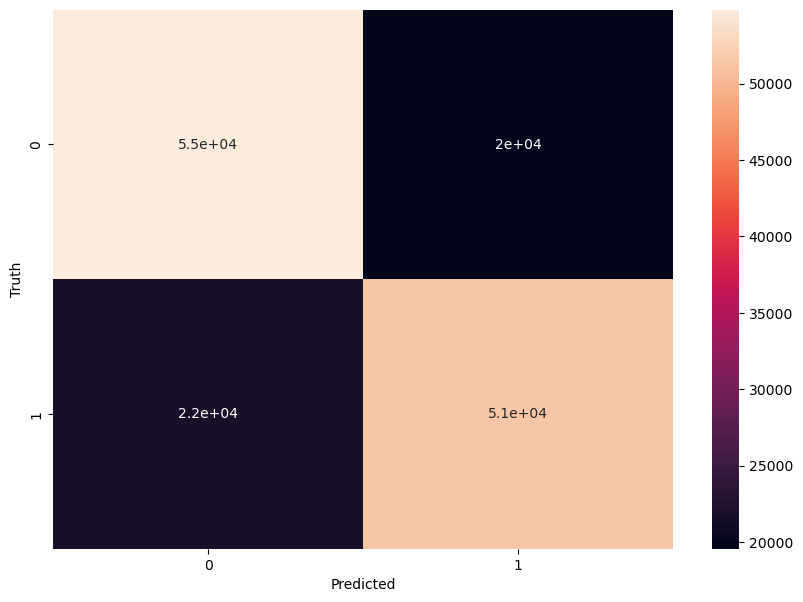

In [33]:
matrixnn2 = confusion_matrix(y2_test, y2_predict_MLP)
plt.figure(figsize=(10,7))
sn.heatmap(matrixnn2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logisticRegr1 = LogisticRegression()
logisticRegr1.fit(x1_train, y1_train)
y1_predict_logistic = logisticRegr1.predict(x1_test)

In [38]:
accuracy_Score_logistic = accuracy_score(y1_test, y1_predict_logistic)
print('LogisticRegression model accuracy is: {:.2f}%'.format(accuracy_Score_logistic*100))

LogisticRegression model accuracy is: 64.34%


Text(95.72222222222221, 0.5, 'Truth')

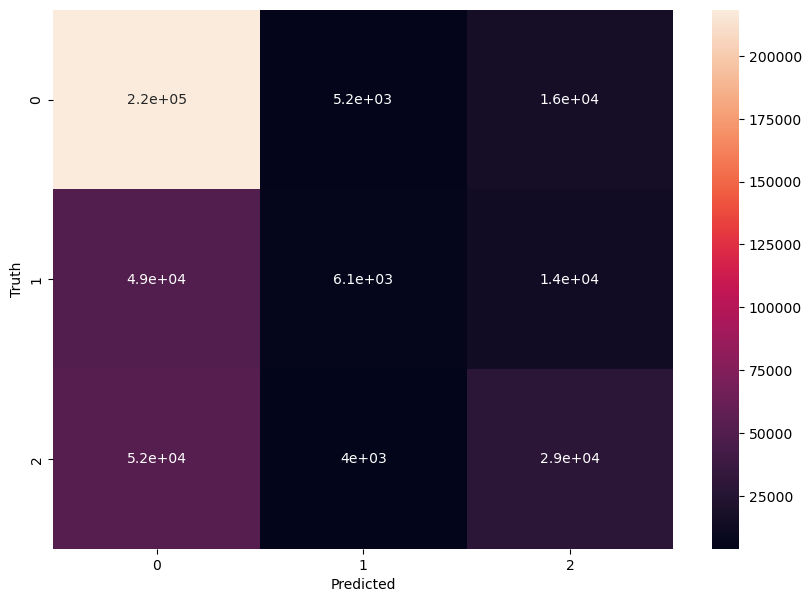

In [39]:
matrixlogistic1 = confusion_matrix(y1_test, y1_predict_logistic)
plt.figure(figsize=(10,7))
sn.heatmap(matrixlogistic1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
logisticRegr2 = LogisticRegression()
logisticRegr2.fit(x2_train, y2_train)
y2_predict_logistic = logisticRegr2.predict(x2_test)

In [41]:
accuracy_Score_logistic = accuracy_score(y2_test, y2_predict_logistic)
print('LogisticRegression model accuracy is: {:.2f}%'.format(accuracy_Score_logistic*100))

LogisticRegression model accuracy is: 70.20%


Text(95.72222222222221, 0.5, 'Truth')

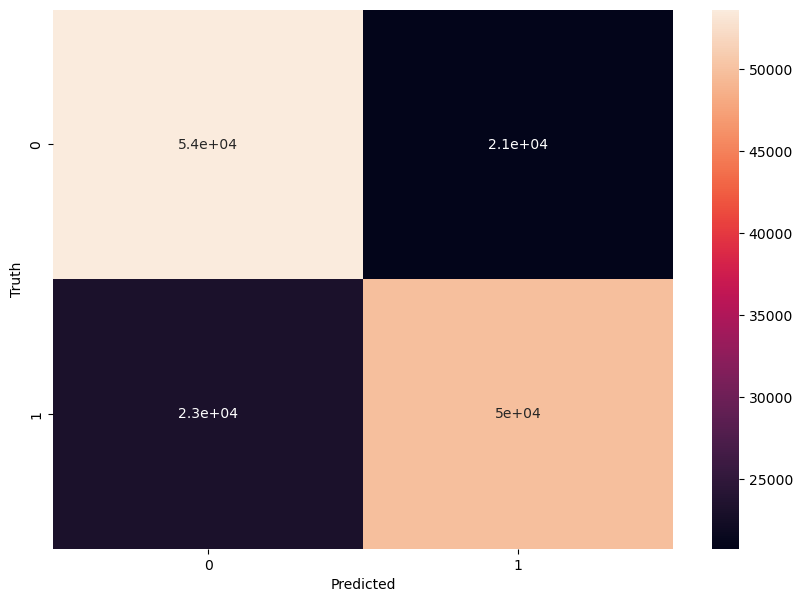

In [42]:
matrixlogistic2 = confusion_matrix(y2_test, y2_predict_logistic)
plt.figure(figsize=(10,7))
sn.heatmap(matrixlogistic2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# GaussianNB only for 2nd Y which is for drinker

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(x2_train, y2_train)
y2_predict_gnb = gnb1.predict(x2_test)
accuracy_Score_gnb = accuracy_score(y2_test, y2_predict_gnb)
print('GaussianNB model accuracy is: {:.2f}%'.format(accuracy_Score_gnb*100))

GaussianNB model accuracy is: 63.70%


Text(95.72222222222221, 0.5, 'Truth')

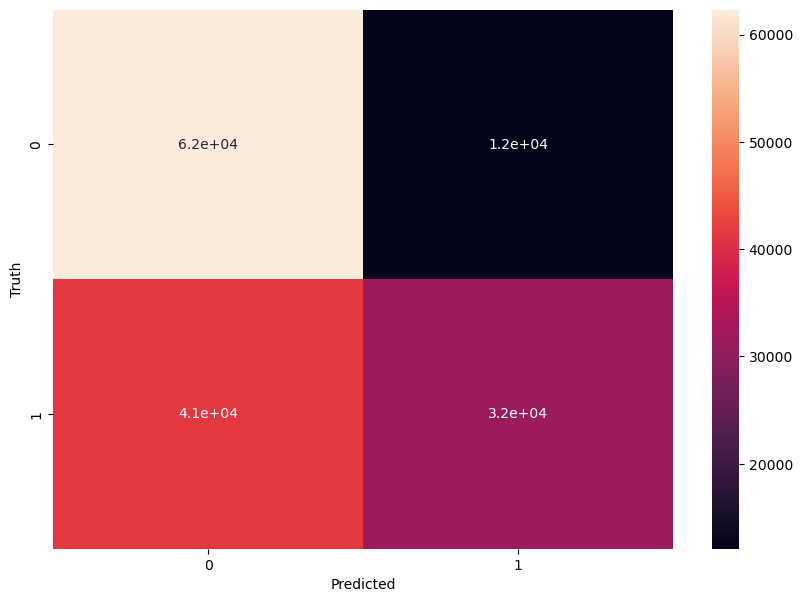

In [36]:
matrixgnb = confusion_matrix(y2_test, y2_predict_gnb)
plt.figure(figsize=(10,7))
sn.heatmap(matrixgnb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x1_train, y1_train)
y1_predict_knn = knn1.predict(x1_test)
accuracy_Score_knn = accuracy_score(y1_test, y1_predict_knn)
print('KNeighborsClassifier model accuracy is: {:.2f}%'.format(accuracy_Score_knn*100))

KNeighborsClassifier model accuracy is: 62.15%


Text(95.72222222222221, 0.5, 'Truth')

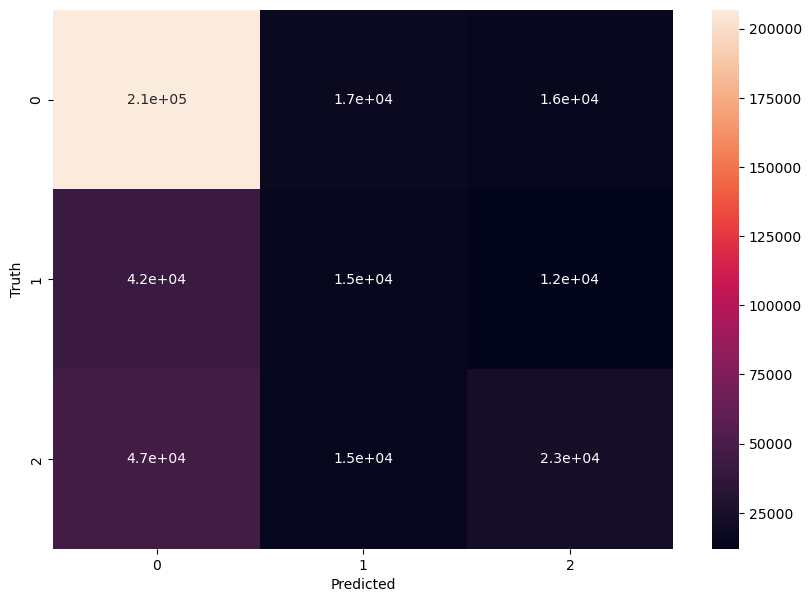

In [27]:
matrixknn1 = confusion_matrix(y1_test, y1_predict_knn)
plt.figure(figsize=(10,7))
sn.heatmap(matrixknn1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
y2_train = y2_train.astype('int')
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x2_train, y2_train)

KNeighborsClassifier()

In [29]:
y2_test = y2_test.astype('int')
y2_predict_knn = knn2.predict(x2_test)
knn2.score(x2_test,y2_test)

0.6642281824591854

Text(95.72222222222221, 0.5, 'Truth')

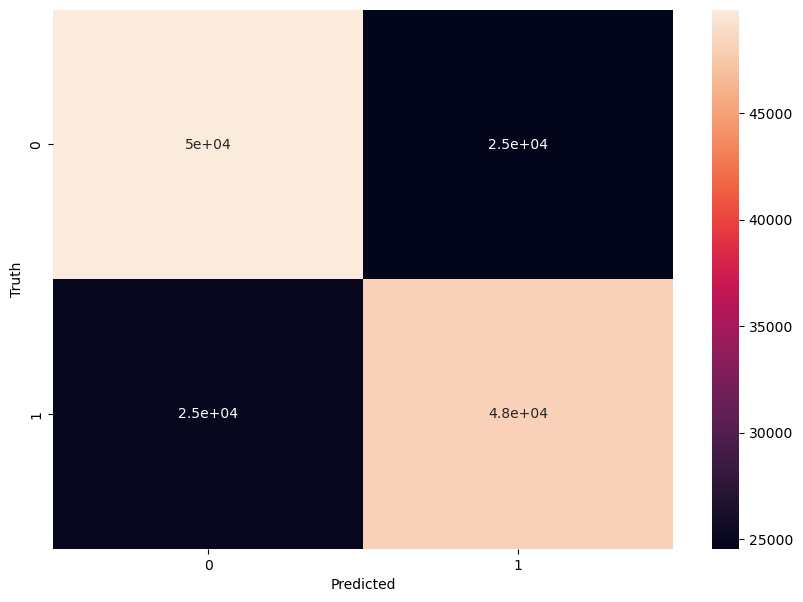

In [30]:
matrixknn2 = confusion_matrix(y2_test, y2_predict_knn)
plt.figure(figsize=(10,7))
sn.heatmap(matrixknn2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Best Accuracy 



-> For Drinker




-> For Smoker
